## Startup notes

Blue book for bulldozers: https://www.kaggle.com/c/bluebook-for-bulldozers/overview \
Bulldozer data: https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip \
Dog breed data: https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip?dl=0

### Download directly

#### Dog breed
```bash
!wget https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip # download files from Dropbox as zip
```

```python
import os
import zipfile

local_zip = 'dog-breed-identification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('Dog Vision') # unzip the files into a file called "Dog Vision"
zip_ref.close()
```

#### Bulldozer
```bash
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip
```

```python
import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()
```

# Predicting Sales Price of Bulldozers using ML

## Overview

### 1. Problem definition

Predict the future auction price of a bulldozer given its characteristics and historic data of previous auctions.

### 2. Data

Data downloaded from kaggle doc.
* Train.csv
* Valid.csv
* Test.csv

### 3. Evaluation

RMSLE: Root mean squared error between the actual and predicted auction prices.
Our goal is to find the lowest RMSLE value.

### 4. Features

Check the Data `Dictionary.xlsx` under `data/bluebook-for-bulldozers`

### 5. Modelling

Model-driven EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [2]:
# Import training and validation sets

df = pd.read_csv(
    "data/bluebook-for-bulldozers/TrainAndValid.csv",
    low_memory=False,
    parse_dates=["saledate"]
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

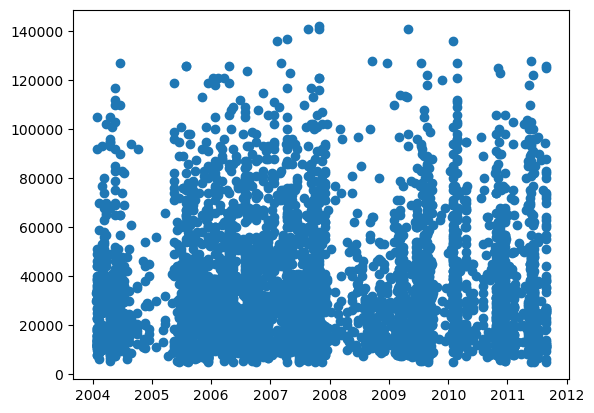

In [5]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:5000], df.SalePrice[:5000]);

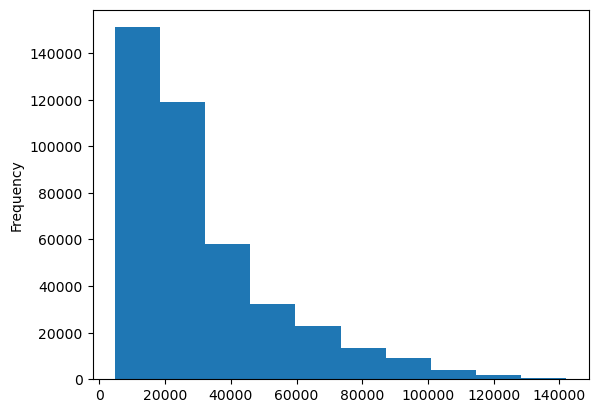

In [6]:
df.SalePrice.plot.hist();

### Parsing dates

When we work with time series data, we need to enrich time and date components as much as possible. \
We do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

I am re-importing the data above properly.

In [7]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with time series data, it's always a good idea to sort by date.

In [8]:
# Sort
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Make a copy of the original DataFrame

Maintain a copy of the original data if we mess up things up

In [9]:
# Copy
df_tmp = df.copy()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

### Add datetime parameters for `saledate` column

Doc: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [10]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek
df["saleDayOfYear"] = df.saledate.dt.dayofyear
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [11]:
# Remove saledate as we do not longer need it
df.drop("saledate", axis=1, inplace=True)

In [12]:
df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

### Fill missing values

One way to turn all data into numbers is by converting them into pandas categories.

Doc: https://pandas.pydata.org/docs/reference/general_functions.html

In [13]:
# Find the columns which contain strings

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(f"Changing string label: {label}")
        df[label] = content.astype("category").cat.as_ordered()
        continue
    if pd.api.types.is_object_dtype(content):
        print(f"Changing object label: {label}")
        df[label] = content.astype("category").cat.as_ordered()
        continue

Changing object label: UsageBand
Changing string label: fiModelDesc
Changing string label: fiBaseModel
Changing object label: fiSecondaryDesc
Changing object label: fiModelSeries
Changing object label: fiModelDescriptor
Changing object label: ProductSize
Changing string label: fiProductClassDesc
Changing string label: state
Changing string label: ProductGroup
Changing string label: ProductGroupDesc
Changing object label: Drive_System
Changing object label: Enclosure
Changing object label: Forks
Changing object label: Pad_Type
Changing object label: Ride_Control
Changing object label: Stick
Changing object label: Transmission
Changing object label: Turbocharged
Changing object label: Blade_Extension
Changing object label: Blade_Width
Changing object label: Enclosure_Type
Changing object label: Engine_Horsepower
Changing object label: Hydraulics
Changing object label: Pushblock
Changing object label: Ripper
Changing object label: Scarifier
Changing object label: Tip_Control
Changing obje

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [15]:
# Check a category and their assigned codes

df.state.cat.categories, df.state.cat.codes

(Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
        'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
        'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
        'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
        'Wyoming'],
       dtype='object'),
 205615    43
 274835     8
 141296     8
 212552     8
 62755      8
           ..
 410879     4
 412476     4
 411927     4
 407124     4
 409203     4
 Length: 412698, dtype: int8)

In [16]:
df.isnull().sum() / len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [17]:
# Optional

# Save preprocessed data
df.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

# Import preprocessed data
df = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412694,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
412695,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
412696,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


### Fill numerical values

In [18]:
# Fill numeric rows with the median (better than mean)
# Mean is sensitive to outliers.
# The median is a better measure of the central tendency of the group as it is not skewed by exceptionally high or low characteristic values.

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Changing numeric column {label}")
            # Add binary column to indicate whether the sample had missing values
            df[label + "_is_missing"] = pd.isnull(content)
            # Fill the column
            df[label] = content.fillna(content.median())

df.auctioneerID.isnull().sum(), df.auctioneerID_is_missing.value_counts()

Changing numeric column auctioneerID
Changing numeric column MachineHoursCurrentMeter


(0,
 auctioneerID_is_missing
 False    392562
 True      20136
 Name: count, dtype: int64)

In [19]:
# Demonstration of median over mean

hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [20]:
df.isnull().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Fill categories

In [21]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Changing category column {label}")
            # Add binary column to indicate whether the sample had missing values
            df[label + "_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes + 1 # null columns get assigned with -1 so we turn it to zero

df.UsageBand.isnull().sum(), df.UsageBand_is_missing.value_counts()

Changing category column UsageBand
Changing category column fiSecondaryDesc
Changing category column fiModelSeries
Changing category column fiModelDescriptor
Changing category column ProductSize
Changing category column Drive_System
Changing category column Enclosure
Changing category column Forks
Changing category column Pad_Type
Changing category column Ride_Control
Changing category column Stick
Changing category column Transmission
Changing category column Turbocharged
Changing category column Blade_Extension
Changing category column Blade_Width
Changing category column Enclosure_Type
Changing category column Engine_Horsepower
Changing category column Hydraulics
Changing category column Pushblock
Changing category column Ripper
Changing category column Scarifier
Changing category column Tip_Control
Changing category column Tire_Size
Changing category column Coupler
Changing category column Coupler_System
Changing category column Grouser_Tracks
Changing category column Hydraulics_Fl

(0,
 UsageBand_is_missing
 True     339028
 False     73670
 Name: count, dtype: int64)

In [22]:
# Manual changes to some remaining columns
df.fiModelDesc = pd.Categorical(df.fiModelDesc).codes + 1
df.fiBaseModel = pd.Categorical(df.fiBaseModel).codes + 1
df.fiProductClassDesc = pd.Categorical(df.fiProductClassDesc).codes + 1
df.state = pd.Categorical(df.state).codes + 1
df.ProductGroup = pd.Categorical(df.ProductGroup).codes + 1
df.ProductGroupDesc = pd.Categorical(df.ProductGroupDesc).codes + 1

In [42]:
# Display all columns instead of ellipsis symbol
pd.options.display.max_columns = None
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,17,1,17,False,True,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,31,1,31,False,True,True,False,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,1989,1,31,1,31,False,True,True,False,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [24]:
df.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 97, dtype: int64

In [25]:
pd.Categorical(df)

['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource', ..., 'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing', 'Travel_Controls_is_missing', 'Differential_Type_is_missing', 'Steering_Controls_is_missing']
Length: 97
Categories (97, object): ['Backhoe_Mounting', 'Backhoe_Mounting_is_missing', 'Blade_Extension', 'Blade_Extension_is_missing', ..., 'saleDayOfYear', 'saleMonth', 'saleYear', 'state']

## Modelling

In [26]:
%%time
# Time the run time. It has to be the first thing in the block in order to work.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_jobs=-1,
    random_state=42
)

X = df.drop("SalePrice", axis=1)
y = df.SalePrice

model.fit(X, y)

CPU times: total: 16min 35s
Wall time: 1min 31s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
# Score the model
# This calculation is not reliable these are all in the same training data set instead of scoring with the testing dataset
model.score(X, y)

0.9875446287048968

In [28]:
# Split data into training and validation for 2012

df_val = df[df.saleYear == 2012]
df_train = df[df.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [29]:
# Split data in to X, y

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 96), (401125,), (11573, 96), (11573,))

### Custom evaluation function

In [30]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# RMSLE: root mean squared log error
def rmsle(y_test, y_preds):
    """
    Calculates the Root Mean Squared Log Error (RMSLE) between predictions and true labels.
    y_test: True labels
    y_preds: Prediction labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate o model on different levels
def show_scores(model, X_train, X_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Training R²": r2_score(y_train, train_preds),
        "Valid R²": r2_score(y_valid, val_preds),
    }
    return scores

### Testing model on a subset (tuning hyperparameters)

In [31]:
# Set max_samples in order to avoid too much fitting time
model = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    bootstrap=True,
    max_samples=10000
)

In [32]:
%%time

model.fit(X_train, y_train)

CPU times: total: 37.3 s
Wall time: 3.38 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [33]:
show_scores(model, X_train, X_valid)

{'Training MAE': 5561.513057924589,
 'Valid MAE': 7155.632784930442,
 'Training RMSLE': 0.2578005599357549,
 'Valid RMSLE': 0.29223097494391737,
 'Training R²': 0.860722898583499,
 'Valid R²': 0.832588403039663}

### Hyperparameter tuning with RandomizedSearchCV

In [34]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparams
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "log2"],
    "max_samples": [10000, 15000, 20000],
}

# Instantiate a RandomizedSearchCV model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=20,
    cv=5,
    verbose=2
)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=15, max_features=sqrt, max_samples=10000, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, max_samples=10000, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, max_samples=10000, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, max_samples=10000, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, max_samples=10000, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END max_depth=10, max_features=1, max_samples=15000, min_samples_leaf=15, min_samples_split=4, n_estimators=70; total time=   0.4s
[CV] END max_depth=10, max_features=1, max_samples=15000, min_samples_leaf=15, min_samples_split=4, n_

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000, 15000, 20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=2)

In [35]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_samples': 15000,
 'max_features': 0.5,
 'max_depth': 20}

In [36]:
# Previous Scores:
# {'Training MAE': 5561.513057924589,
#  'Valid MAE': 7155.632784930442,
#  'Training RMSLE': 0.2578005599357549,
#  'Valid RMSLE': 0.29223097494391737,
#  'Training R²': 0.860722898583499,
#  'Valid R²': 0.832588403039663}

show_scores(model, X_train, X_valid)

{'Training MAE': 5561.513057924589,
 'Valid MAE': 7155.632784930442,
 'Training RMSLE': 0.2578005599357549,
 'Valid RMSLE': 0.29223097494391737,
 'Training R²': 0.860722898583499,
 'Valid R²': 0.832588403039663}

### Train a model with the best known hyperparameters for this case

**Note**: These were found after 100 iterations of `RandomizedSearchCV`.

In [37]:
%%time

# Better parameters
ideal_model = RandomForestRegressor(
    n_jobs=-1,
    n_estimators=40,
    min_samples_leaf=1,
    min_samples_split=14,
    max_features=0.5,
    max_depth=None,
    max_samples=None,
    random_state=42
)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 2min 45s
Wall time: 16.3 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [38]:
show_scores(ideal_model, X_train, X_valid)

{'Training MAE': 2953.304382328229,
 'Valid MAE': 5956.809650765901,
 'Training RMSLE': 0.144538029644307,
 'Valid RMSLE': 0.24558430490333427,
 'Training R²': 0.9588230526025705,
 'Valid R²': 0.8817761750836023}

### Make predictions on test data

In [82]:
test_df = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,80,NX,3,NaN,Small,"Hydraulic Excavator, Track - 8.0 to 11.0 Metri...",Florida,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,28,N,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,35,N,NaN,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,35,N,NaN,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,N

### Redo all the preprocessing steps with a function

In [83]:
# This is not a good and generic function.
# It can only be used for this specific case.
def preprocess_data(df):
    """
    Performs transformations on df and returns a transformed df.
    """
    # Add columns
    print("Adding denormalized date columns")
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop saledate column if it exists
    try:
        df.drop("saledate", axis=1, inplace=True)
    except:
        pass

    for label, content in df.items():
        if label == "auctioneerID":
            df["auctioneerID_is_missing"] = False
            continue

        if pd.api.types.is_numeric_dtype(content):
            # Fill numeric data with median
            if pd.isnull(content).sum():
                print(f"Changing numeric column {label}")
                # Add binary column to indicate whether the sample had missing values
                df[label + "_is_missing"] = pd.isnull(content)
                # Fill the column
                df[label] = content.fillna(content.median())
        else:
            # Fill categorical data into numbers
            if pd.isnull(content).sum():
                print(f"Changing category column {label}")
                # Add binary column to indicate whether the sample had missing values
                df[label + "_is_missing"] = pd.isnull(content)
                # Turn categories into numbers and add +1
                df[label] = pd.Categorical(content).codes + 1 # null columns get assigned with -1 so we turn it to zero

    # Manual changes to some remaining columns
    df.fiModelDesc = pd.Categorical(df.fiModelDesc).codes + 1
    df.fiBaseModel = pd.Categorical(df.fiBaseModel).codes + 1
    df.fiProductClassDesc = pd.Categorical(df.fiProductClassDesc).codes + 1
    df.state = pd.Categorical(df.state).codes + 1
    df.ProductGroup = pd.Categorical(df.ProductGroup).codes + 1
    df.ProductGroupDesc = pd.Categorical(df.ProductGroupDesc).codes + 1

    return df

In [84]:
test_df = preprocess_data(test_df)
test_df

Adding denormalized date columns
Changing numeric column MachineHoursCurrentMeter
Changing category column UsageBand
Changing category column fiSecondaryDesc
Changing category column fiModelSeries
Changing category column fiModelDescriptor
Changing category column ProductSize
Changing category column Drive_System
Changing category column Enclosure
Changing category column Forks
Changing category column Pad_Type
Changing category column Ride_Control
Changing category column Stick
Changing category column Transmission
Changing category column Turbocharged
Changing category column Blade_Extension
Changing category column Blade_Width
Changing category column Enclosure_Type
Changing category column Engine_Horsepower
Changing category column Hydraulics
Changing category column Pushblock
Changing category column Ripper
Changing category column Scarifier
Changing category column Tip_Control
Changing category column Tire_Size
Changing category column Coupler
Changing category column Coupler_Sys

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,False,False,False,True,True,True,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,False,False,False,False,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,44,37,0,6,26,8,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0

In [85]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,17,1,17,False,True,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,31,1,31,False,True,True,False,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,1989,1,31,1,31,False,True,True,False,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,690,50,0,0,0,53,

In [86]:
test_df.info(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 96 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SalesID                              12457 non-null  int64  
 1   MachineID                            12457 non-null  int64  
 2   ModelID                              12457 non-null  int64  
 3   datasource                           12457 non-null  int64  
 4   auctioneerID                         12457 non-null  int64  
 5   YearMade                             12457 non-null  int64  
 6   MachineHoursCurrentMeter             12457 non-null  float64
 7   UsageBand                            12457 non-null  int8   
 8   fiModelDesc                          12457 non-null  int16  
 9   fiBaseModel                          12457 non-null  int16  
 10  fiSecondaryDesc                      12457 non-null  int8   
 11  fiModelSeries               

(None, None)

In [89]:
# One less sale price column for test_df
len(df.columns), len(test_df.columns)

(97, 96)

In [94]:
# No sale price column so we can use it as is
test_preds = ideal_model.predict(test_df)
test_preds, len(test_preds)

(array([17089.91754882, 18386.75119283, 47939.86435909, ...,
        14028.45417797, 17072.74720592, 27020.16142297]),
 12457)

### Format predictions to the queried one from Kaggle (SalesID, SalesPrice)

In [96]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = test_df.SalesID
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17089.917549
1,1227844,18386.751193
2,1227847,47939.864359
3,1227848,74966.523687
4,1227863,57382.771263
...,...,...
12452,6643171,46234.509844
12453,6643173,13840.031787
12454,6643184,14028.454178
12455,6643186,17072.747206


In [97]:
## Export prediction data

df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature importance

Feature importance seeks to figure out which data attributes were most important when it comes to predictions.

In [99]:
len(ideal_model.feature_importances_), ideal_model.feature_importances_

(96,
 array([3.31827683e-02, 2.14398967e-02, 4.07617273e-02, 2.02449857e-03,
        3.32035542e-03, 1.98234498e-01, 3.17824881e-03, 1.01231594e-03,
        3.64978944e-02, 5.23351588e-02, 6.97662393e-02, 5.00508425e-03,
        1.83065068e-02, 1.66543792e-01, 4.44724386e-02, 6.01736183e-03,
        1.69716741e-03, 2.65787193e-03, 3.43447646e-03, 5.67191540e-02,
        4.08150785e-04, 1.00632215e-04, 1.00311514e-03, 1.64300703e-04,
        1.66124523e-03, 2.37433902e-05, 4.21960020e-03, 1.06586799e-02,
        2.27045919e-03, 3.47115046e-03, 4.00612755e-03, 1.73187412e-03,
        3.13726474e-03, 9.00784988e-04, 6.02052963e-04, 6.12744388e-03,
        8.73465658e-04, 8.61569566e-03, 7.28684626e-04, 1.67176174e-03,
        1.07228589e-03, 8.04299433e-04, 2.74643150e-03, 5.52443859e-04,
        1.07520932e-03, 3.70389398e-04, 3.85974118e-04, 2.19408050e-03,
        9.12643633e-04, 3.12595783e-04, 2.25538611e-04, 7.36940797e-02,
        3.75973993e-03, 5.62592331e-03, 2.90631608e-03, 9.9

In [104]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (
        pd
        .DataFrame({"features": columns, "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True)
    )

    # Plot
    fig, ax = plt.subplots()
    ax.barh(df.features[:n], df.feature_importances[:n])
    ax.set_ylabel("Feature")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

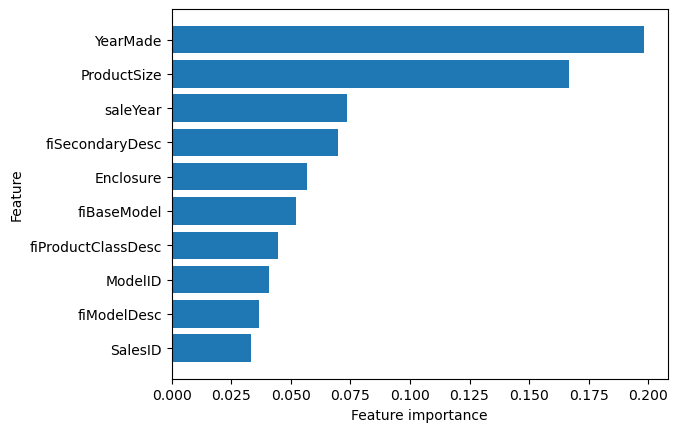

In [107]:
plot_features(X_train.columns, ideal_model.feature_importances_, 10)